**Import Required Libraries**

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb

*  import numpy as np: Imports the NumPy library for numerical operations.
*  import tensorflow: Imports the TensorFlow library.
*  from tensorflow.keras.models import Sequential: Imports the Sequential model class from Keras.
*  from tensorflow.keras.layers import Embedding, GRU, Dense: Imports the Embedding, GRU, and Dense layer classes from Keras.
*  from tensorflow.keras.optimizers import Adam: Imports the Adam optimizer.
*  from tensorflow.keras.preprocessing.sequence import pad_sequences: Imports the pad_sequences utility for padding sequences to the same length.
*  from tensorflow.keras.utils import plot_model: Imports the plot_model utility for visualizing the model architecture.
*  from tensorflow.keras.datasets import imdb: Imports the IMDB dataset for binary sentiment classification.

**Define Hyperparameters**

In [ ]:
max_features = 20000
maxlen = 200
batch_size = 32
embedding_dim = 100
hidden_dim = 128
dropout = 0.2
learning_rate = 0.001
num_epochs = 10

*  max_features: The maximum number of words to consider in the vocabulary.
*  maxlen: The maximum length of sequences after padding.
*  batch_size: The number of samples per batch.
*  embedding_dim: The dimension of the embedding vectors.
*  hidden_dim: The number of units in the GRU layer.
*  dropout: The dropout rate for regularization in the GRU layer.
*  learning_rate: The learning rate for the Adam optimizer.
*  num_epochs: The number of epochs to train the model.

**Load Data**

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 2s 0us/step


imdb.load_data(num_words=max_features): Loads the IMDB dataset, keeping only the top max_features most frequent words.

**Preprocess Data**

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

* pad_sequences(x_train, maxlen=maxlen): Pads/truncates the training sequences to the same length of maxlen.
* pad_sequences(x_test, maxlen=maxlen): Pads/truncates the test sequences to the same length of maxlen.

**Print the Shape of Training Data**

In [ ]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

**Define the Model**

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embedding_dim))
model.add(GRU(hidden_dim, dropout=dropout))
model.add(Dense(1, activation='sigmoid'))

*  model = Sequential(): Initializes a sequential model.
*  model.add(Embedding(max_features, embedding_dim)): Adds an embedding layer that converts word indices to dense vectors of size embedding_dim.
*  model.add(GRU(hidden_dim, dropout=dropout)): Adds a GRU layer with hidden_dim units and a dropout rate of dropout.
*  model.add(Dense(1, activation='sigmoid')): Adds a dense output layer with 1 unit and a sigmoid activation function, suitable for binary classification.

**Compile the Model**

In [ ]:
optimizer = Adam(learning_rate = learning_rate)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

*  optimizer = Adam(learning_rate = learning_rate): Initializes the Adam optimizer with the specified learning rate.
*  model.compile(...): Compiles the model with the following parameters:
   *  loss = 'binary_crossentropy': Uses binary cross-entropy as the loss function.
   *  optimizer = optimizer: Uses the Adam optimizer.
   *  metrics = ['accuracy']: Tracks accuracy during training.*  

**Train the Model**

In [ ]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 59s 86ms/step - loss: 0.4732 - accuracy: 0.7548 - val_loss: 0.3303 - val_accuracy: 0.8650
Epoch 2/10
625/625 [==============================] - 18s 28ms/step - loss: 0.2315 - accuracy: 0.9104 - val_loss: 0.3108 - val_accuracy: 0.8728
Epoch 3/10
625/625 [==============================] - 12s 20ms/step - loss: 0.1294 - accuracy: 0.9538 - val_loss: 0.3650 - val_accuracy: 0.8770
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.0659 - accuracy: 0.9780 - val_loss: 0.3934 - val_accuracy: 0.8716
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.5519 - val_accuracy: 0.8622
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.6425 - val_accuracy: 0.8668
Epoch 7/10
625/625 [==============================] - 7s 12ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.6096 - val_accuracy: 0.

model.fit(...): Trains the model on the training data for the specified number of epochs with a batch size of batch_size. validation_split = 0.2 specifies that 20% of the training data should be used for validation.

**Summarize the Model**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2088449 (7.97 MB)
Trainable params: 2088449 (7.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


print(model.summary()): Prints a summary of the model architecture, including the number of parameters in each layer.

**Evaluate the Model**

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.6651 - accuracy: 0.8549


[0.6651018261909485, 0.8549200296401978]

model.evaluate(x_test, y_test): Evaluates the trained model on the test data and returns the loss and accuracy.

**Visualize the Model**

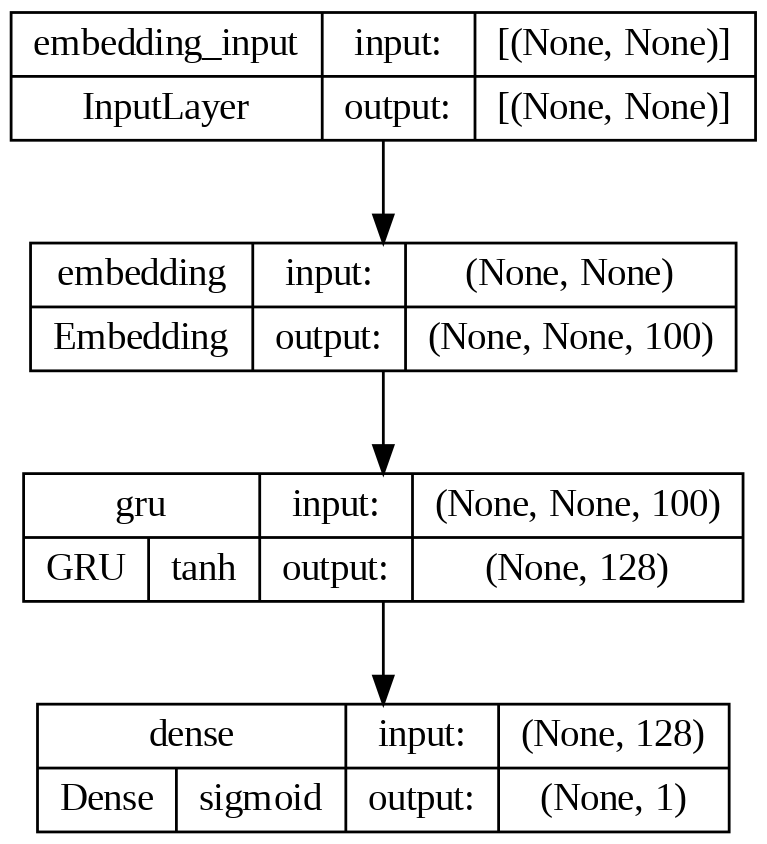

In [ ]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)

plot_model(...): Generates a plot of the model architecture and saves it as model.png. The options specified include:
*  show_shapes=True: Displays the shapes of the layers.
*  show_layer_names=True: Displays the names of the layers.
*  rankdir='TB': Sets the direction of the plot (top to bottom).
*  dpi=200: Sets the resolution of the plot.
*  show_layer_activations=True: Displays the activation functions used in each layer.

**Summary**<br>
This code sets up, trains, and evaluates a GRU-based neural network for binary sentiment classification using the IMDB dataset. It includes preprocessing steps to prepare the data, defining and compiling the model, training the model on the training data, evaluating the model on the test data, and visualizing the model architecture. The network consists of an embedding layer, a GRU layer with dropout for regularization, and a dense output layer with a sigmoid activation function.